<a href="https://colab.research.google.com/github/wanasyraf4/Canting/blob/main/canting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px
import cv2
import pandas as pd
import matplotlib.image as im
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

# Importing the modules
from scipy.cluster.vq import whiten
from google.colab import drive
from plotly.subplots import make_subplots
drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/datacanting/batik2.jpg"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(810, 1080, 4)



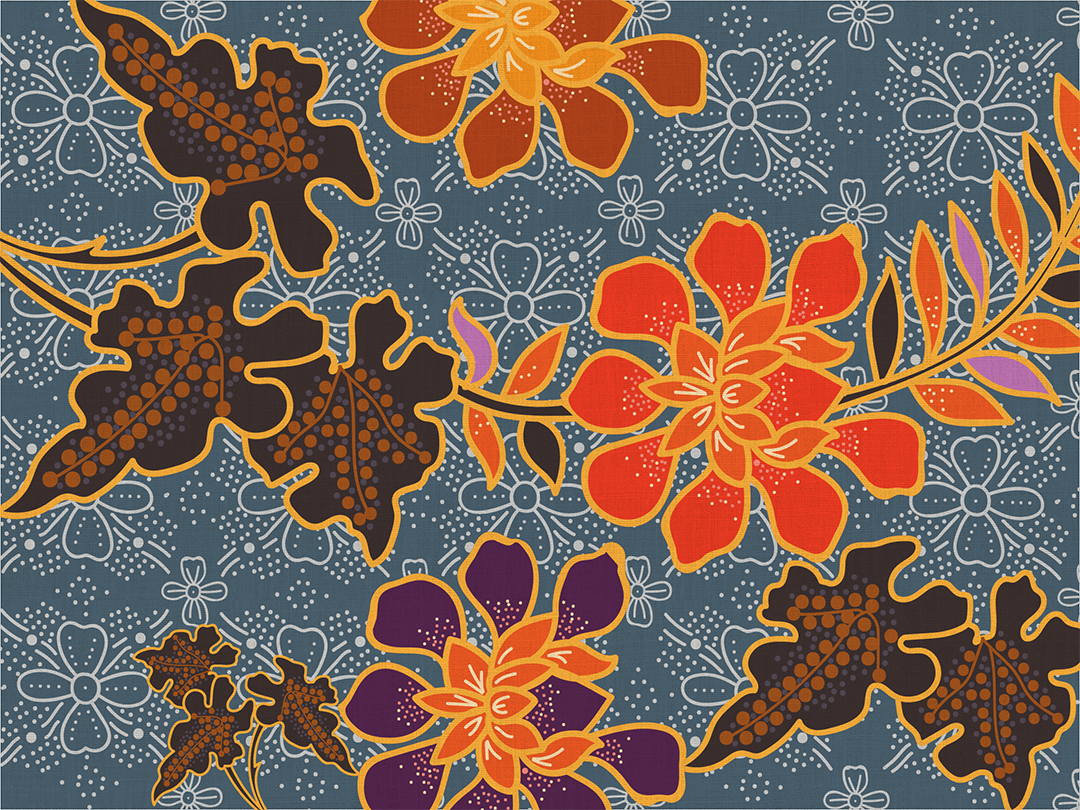

In [ ]:
img = im.imread(path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
px.imshow(img)

In [ ]:

  
# Store RGB values of all pixels in lists r, g and b
r = []
g = []
b = []
for row in img:
    for temp_r, temp_g, temp_b, temp in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
  
# only printing the size of these lists
# as the content is too big
print(len(r))
print(len(g))
print(len(b))
  
# Saving as DataFrame
img_df = pd.DataFrame({'red' : r,
                          'green' : g,
                          'blue' : b})
  
# Scaling the values
img_df['scaled_color_red'] = whiten(img_df['red'])
img_df['scaled_color_blue'] = whiten(img_df['blue'])
img_df['scaled_color_green'] = whiten(img_df['green'])

874800
874800
874800


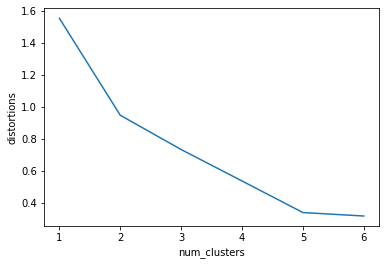

In [ ]:
# Preparing data to construct elbow plot.
distortions = []
num_clusters = range(1, 7)  #range of cluster sizes
  
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(img_df[['scaled_color_red', 
                                                    'scaled_color_blue', 
                                                    'scaled_color_green']], i)
    distortions.append(distortion)
      
# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters' : num_clusters,
                           'distortions' : distortions})
  
# Create a line plot of num_clusters and distortions
sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

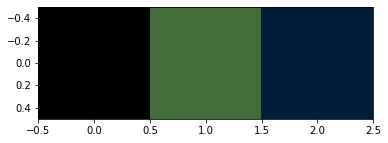

In [ ]:
cluster_centers, _ = kmeans(img_df[['scaled_color_red',
                                    'scaled_color_blue',
                                    'scaled_color_green'
                                   ]], 3)
  
dominant_colors = []
  
# Get standard deviations of each color
red_std, green_std, blue_std = img_df[['red',
                                       'green',
                                       'blue'
                                      ]].std()
  
for cluster_center in cluster_centers:
    red_scaled, green_scaled, blue_scaled = cluster_center
  
    # Convert each standardized value to scaled value
    dominant_colors.append((
        red_scaled * red_std / 255,
        green_scaled * green_std / 255,
        blue_scaled * blue_std / 255
    ))
  
# Display colors of cluster centers
plt.imshow([dominant_colors])
plt.show()

In [ ]:
img_df

,red,green,blue,scaled_color_red,scaled_color_blue,scaled_color_green
0,-46,-41,-40,-0.748931,-0.715085,-0.574134
1,-109,-98,-92,-1.774642,-1.644696,-1.372319
2,-100,-91,-86,-1.628112,-1.537433,-1.274296
3,-97,-88,-82,-1.579268,-1.465925,-1.232287
4,-93,-84,-79,-1.514144,-1.412294,-1.176274
...,...,...,...,...,...,...
874795,-72,-68,-67,-1.172240,-1.197768,-0.952222
874796,-97,-87,-82,-1.579268,-1.465925,-1.218283
874797,-92,-84,-81,-1.497863,-1.448048,-1.176274
874798,-69,-69,-71,-1.123397,-1.269276,-0.966225
